In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)
library("motifStack")  # for PWM similarity
library("seqLogo")
library(universalmotif)
# library(MotiV)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [2]:
# list.files()

down = import('extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.downregulated_peaks.log2FC.0.5.padj.0.1..bed', format='BED')
up = import('extended50merged50.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.upregulated_peaks.log2FC.0.5.padj.0.1..bed', format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 11930

[1] 12534

Initial peak counts:
Downregulated peaks: 11930 
Upregulated peaks: 12534 


In [3]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				11930 170.5
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			596

[a,c,g,t] frequencies in input data:				0.209736 0.290264 0.290264 0.209736
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 7
   spacedDyad: tcctcnnnnnnnaaaaa    motifConsensus: rGrrrrrGArrrrGArr     0.50 fitness: -3490.54
   spacedDyad: cttnnnnnnnnnnaaaat   motifConsensus: GrGGnGGrGGvGGnGGrG    0.70 fitness: -3140.13
   spacedDyad: tctcnnnnaaaat        motifConsensus: nAAAAAArAAAAA         0.10 

In [4]:
# str(gadem_down)
# str(gadem_up)

In [5]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 6536 4120 2403 2714 3199 1073

[1] "nArrArrArrArrArrArn"   "nGGvGGnGGvGGnGGnGGs"   "sCAGCAGsn"            
[4] "nssssssssssrGCbsssGsn" "nAAAAwhwwnwwhwwwAAww"  "nGGAGCTGn"

consensus

[1] "nArrArrArrArrArrArn"

[1] "nGGvGGnGGvGGnGGnGGs"

[1] "sCAGCAGsn"

[1] "nssssssssssrGCbsssGsn"

[1] "nAAAAwhwwnwwhwwwAAww"

In [6]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 6275 4569 2400

[1] "nyCyyyyTCyyyCTCyyyCyn" "ChsCnsChsCwsCm"        "nCCCwGsCCn"

consensus

[1] "nyCyyyyTCyyyCTCyyyCyn"

[1] "ChsCnsChsCwsCm"

[1] "nCCCwGsCCn"

[1] NA

[1] NA

In [7]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [8]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 6

[1] 3

In [9]:
print("Motif Visualization")

[1] "Motif Visualization"


In [10]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.2082 0.7878 0.4028 0.4551 0.6404 0.4635 0.4164 0.7969 0.4083 0.4445 0.7461
C 0.2803 0.0390 0.0294 0.0382 0.0457 0.0413 0.0715 0.0426 0.0448 0.0506 0.0489
G 0.3497 0.0846 0.5296 0.4827 0.2647 0.4387 0.4775 0.0964 0.4986 0.4729 0.1427
T 0.1619 0.0886 0.0382 0.0240 0.0492 0.0565 0.0345 0.0640 0.0483 0.0320 0.0623
      12     13     14     15     16     17     18     19
A 0.4506 0.3700 0.7786 0.4158 0.4755 0.7440 0.4806 0.2478
C 0.0339 0.0578 0.0515 0.0413 0.0373 0.0391 0.0397 0.2234
G 0.4720 0.5378 0.1188 0.4905 0.4619 0.1659 0.4227 0.3307
T 0.0434 0.0344 0.0510 0.0524 0.0252 0.0510 0.0570 0.1981

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1244 0.1578 0.0741 0.3585 0.1105 0.1185 0.2585 0.1219 0.1565 0.3546 0.0850
C 0.3000 0.0509 0.0369 0.2753 0.0582 0.0535 0.3089 0.0296 0.0552 0.3239 0.0131
G 0.3744 0.7373 0.8862 0.2923 0.8054 0.8173 0.2999 0.8098 0.7841 0.2522 0.8936
T 0.2012 0.0541 0.0027 0.0740 0.0259 0.0107 0.1328 0.0388 0.0041 0.0693 0.0083
      12     13     14     15     16     17     18     19
A 0.0829 0.2745 0.2146 0.0783 0.3249 0.1319 0.1663 0.1392
C 0.0979 0.3316 0.0337 0.0216 0.3087 0.0262 0.0704 0.3923
G 0.8146 0.2803 0.7350 0.8943 0.2857 0.8239 0.7604 0.3227
T 0.0046 0.1136 0.0167 0.0058 0.0807 0.0180 0.0029 0.1459

$motif_3
       1      2      3      4      5      6      7      8      9
A 0.1537 0.0005 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.2970
C 0.3440 0.9985 0.0005 0.0005 0.9985 0.0005 0.0005 0.6073 0.2618
G 0.3562 0.0005 0.0005 0.9985 0.0005 0.0005 0.9985 0.3917 0.2030
T 0.1461 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.2382

$motif_4
       1      2      3      4      5      6      7      8      9     10     11
A 0.1825 0.0005 0.1463 0.0421 0.1002 0.0318 0.0034 0.0009 0.0152 0.0027 0.0009
C 0.2714 0.4010 0.3673 0.3528 0.3546 0.3605 0.4833 0.5227 0.4837 0.3877 0.3631
G 0.3549 0.5980 0.4855 0.6047 0.5444 0.6061 0.5072 0.4627 0.4116 0.6069 0.6356
T 0.1912 0.0005 0.0009 0.0005 0.0009 0.0016 0.0060 0.0137 0.0895 0.0027 0.0005
      12     13     14     15     16     17     18     19     20     21
A 0.3017 0.0005 0.0027 0.0718 0.0005 0.0009 0.2097 0.0038 0.0012 0.1871
C 0.1972 0.2141 0.7227 0.3605 0.3726 0.4980 0.2579 0.2602 0.5469 0.3091
G 0.5006 0.7849 0.2708 0.3259 0.6242 0.4995 0.5249 0.7355 0.4509 0.3174
T 0.0005 0.0005 0.0038 0.2417 0.0027 0.0016 0.0075 0.0005 0.0009 0.1863

$motif_5
       1      2      3      4      5      6      7      8      9     10     11
A 0.2183 0.6848 0.7431 0.6589 0.6797 0.4382 0.4033 0.4444 0.4185 0.2766 0.4853
C 0.2868 0.0184 0.0802 0.1875 0.0102 0.0822 0.2838 0.1640 0.1088 0.2747 0.1175
G 0.2652 0.0018 0.0930 0.0145 0.0205 0.1580 0.0517 0.0064 0.0563 0.1231 0.0127
T 0.2297 0.2951 0.0836 0.1391 0.2897 0.3215 0.2613 0.3852 0.4164 0.3256 0.3845
      12     13     14     15     16     17     18     19     20
A 0.3995 0.4036 0.5533 0.3712 0.5078 0.6663 0.6187 0.5023 0.5917
C 0.1949 0.2563 0.0429 0.0873 0.1628 0.0895 0.0699 0.1832 0.0112
G 0.0657 0.0548 0.0177 0.1790 0.1088 0.0483 0.0683 0.0409 0.0049
T 0.3399 0.2853 0.3861 0.3625 0.2206 0.1960 0.2430 0.2735 0.3921

$motif_6
       1      2      3      4      5      6      7      8      9
A 0.3208 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.0005 0.2169
C 0.1806 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.0005 0.2396
G 0.2393 0.9985 0.9985 0.0005 0.9985 0.0005 0.0005 0.9985 0.4088
T 0.2592 0.0005 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.1347

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.1881 0.0096 0.0030 0.0663 0.0116 0.0053 0.0196 0.0080 0.0196 0.0686 0.0511
C 0.3431 0.3119 0.7036 0.3512 0.4725 0.4659 0.5723 0.2739 0.7105 0.4137 0.3529
G 0.2361 0.1002 0.0684 0.0412 0.0932 0.0228 0.1366 0.0471 0.1099 0.0147 0.1820
T 0.2326 0.5783 0.2249 0.5413 0.4226 0.5061 0.2715 0.6710 0.1600 0.5031 0.4140
      12     13     14     15     16     17     18     19     20     21
A 0.0073 0.0237 0.0180 0.0070 0.1257 0.0186 0.0043 0.0030 0.0851 0.1671
C 0.4678 0.6943 0.2333 0.7135 0.3046 0.3868 0.5300 0.7657 0.3533 0.3649
G 0.0974 0.0597 0.0086 0.0986 0.0345 0.1729 0.0186 0.0477 0.0261 0.2430
T 0.4275 0.2224 0.7401 0.1809 0.5352 0.4216 0.4471 0.1836 0.5355 0.2250

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.0005 0.2729 0.0005 0.0005 0.3251 0.0005 0.0005 0.3347 0.0005 0.0005 0.3035
C 0.9985 0.3059 0.5678 0.9985 0.2294 0.3627 0.9985 0.3581 0.3860 0.9985 0.2893
G 0.0005 0.0520 0.3760 0.0005 0.1086 0.4607 0.0005 0.0110 0.4000 0.0005 0.0088
T 0.0005 0.3692 0.0558 0.0005 0.3369 0.1761 0.0005 0.2963 0.2135 0.0005 0.3985
      12     13     14
A 0.0005 0.0005 0.2878
C 0.3852 0.9985 0.4677
G 0.4358 0.0005 0.0022
T 0.1785 0.0005 0.2423

$motif_3
       1      2      3      4      5      6      7      8      9     10
A 0.1573 0.0005 0.0005 0.0005 0.5881 0.0005 0.0005 0.0005 0.0005 0.2209
C 0.3011 0.9985 0.9985 0.9985 0.0005 0.0005 0.5161 0.9985 0.9985 0.3644
G 0.3431 0.0005 0.0005 0.0005 0.0005 0.9985 0.4829 0.0005 0.0005 0.1456
T 0.1985 0.0005 0.0005 0.0005 0.4109 0.0005 0.0005 0.0005 0.0005 0.2690

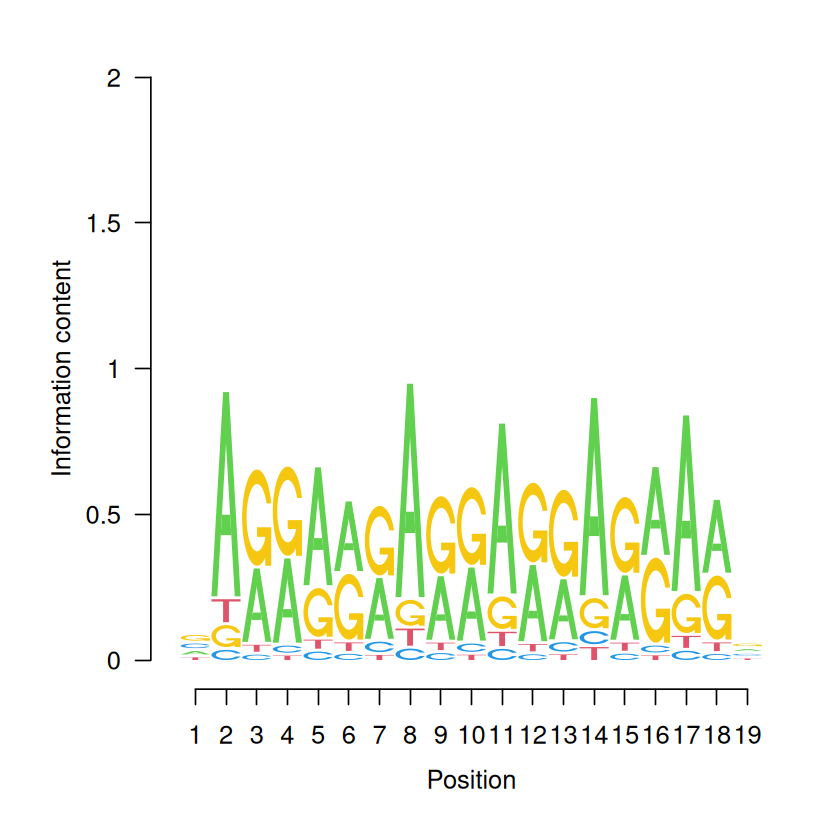

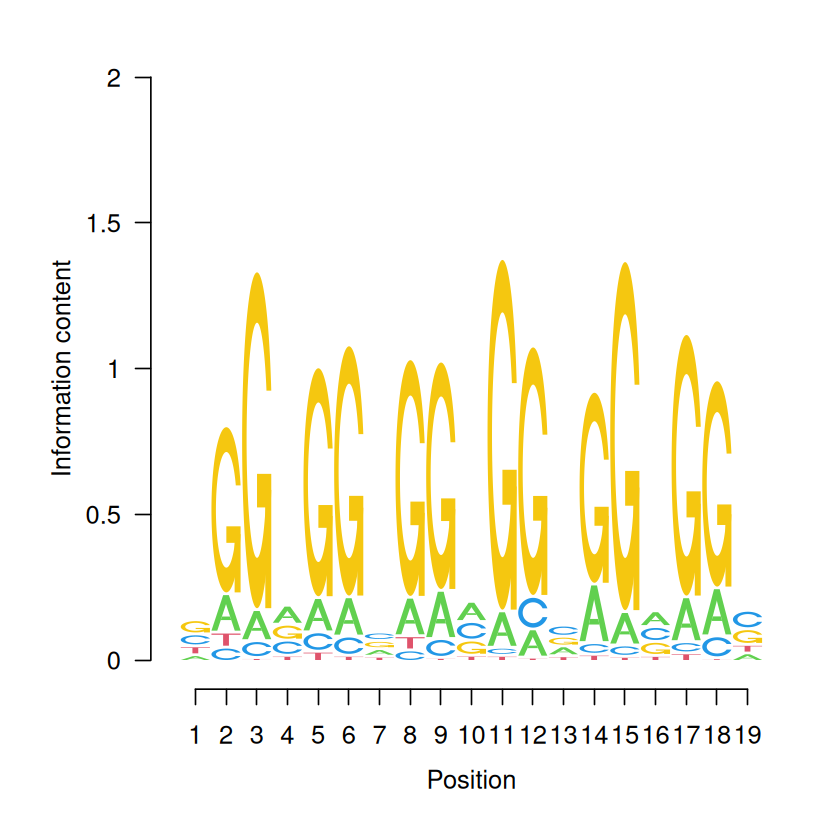

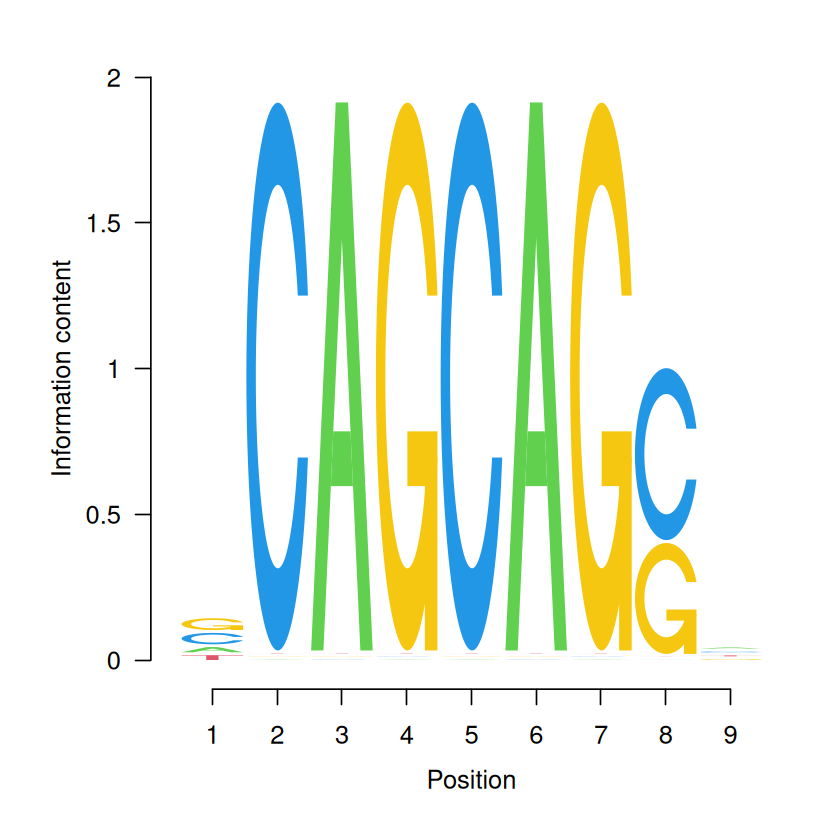

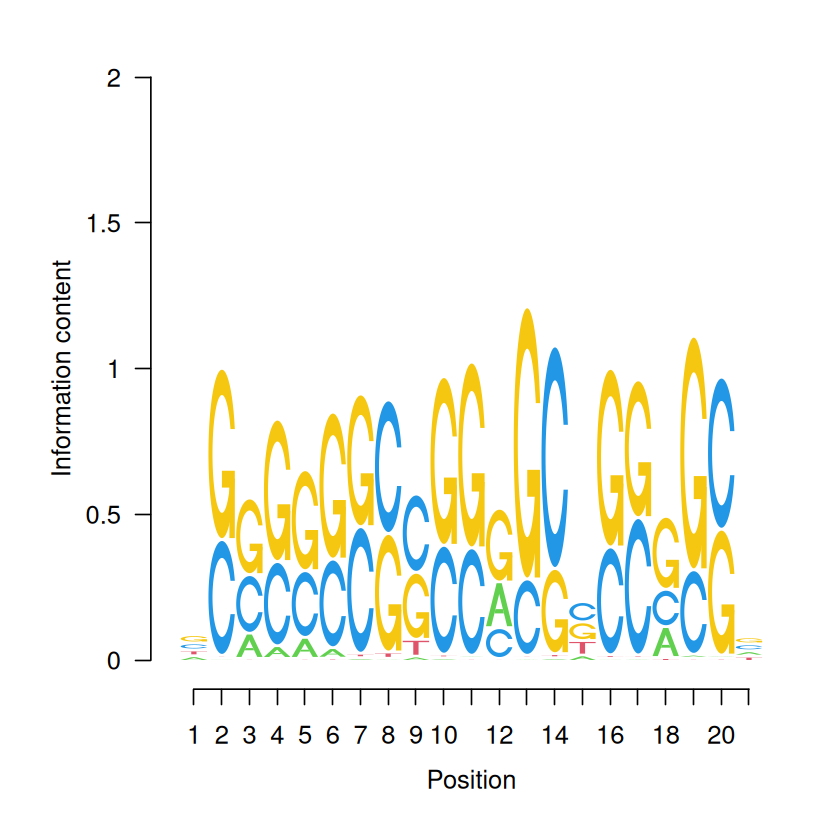

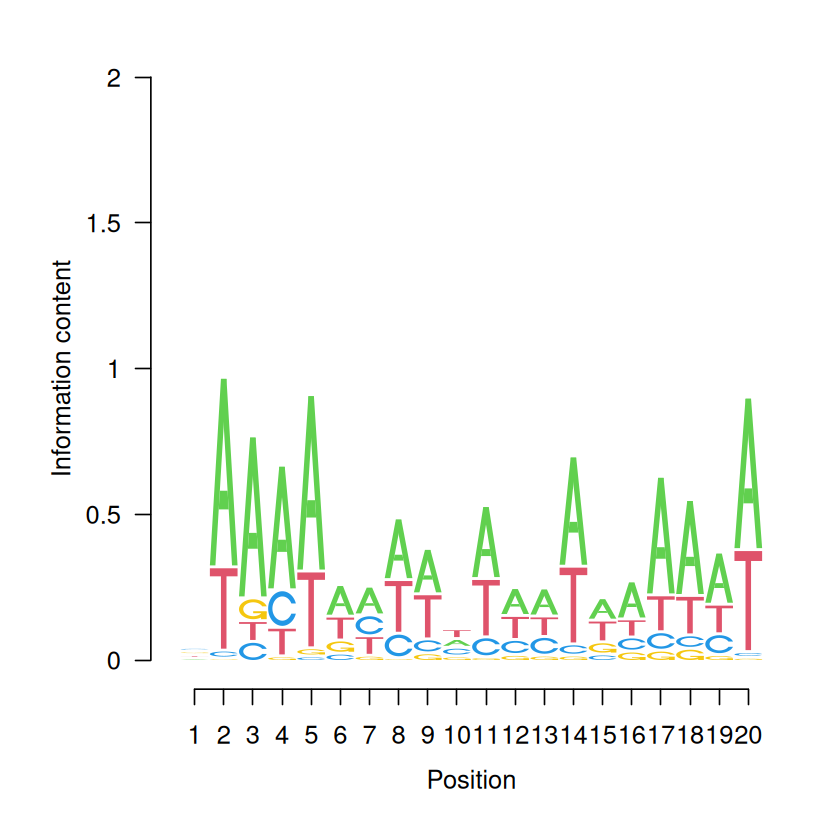

In [13]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(pwm_list_down$motif_1)
seqLogo(pwm_list_down$motif_2)
seqLogo(pwm_list_down$motif_3)
seqLogo(pwm_list_down$motif_4)
seqLogo(pwm_list_down$motif_5)

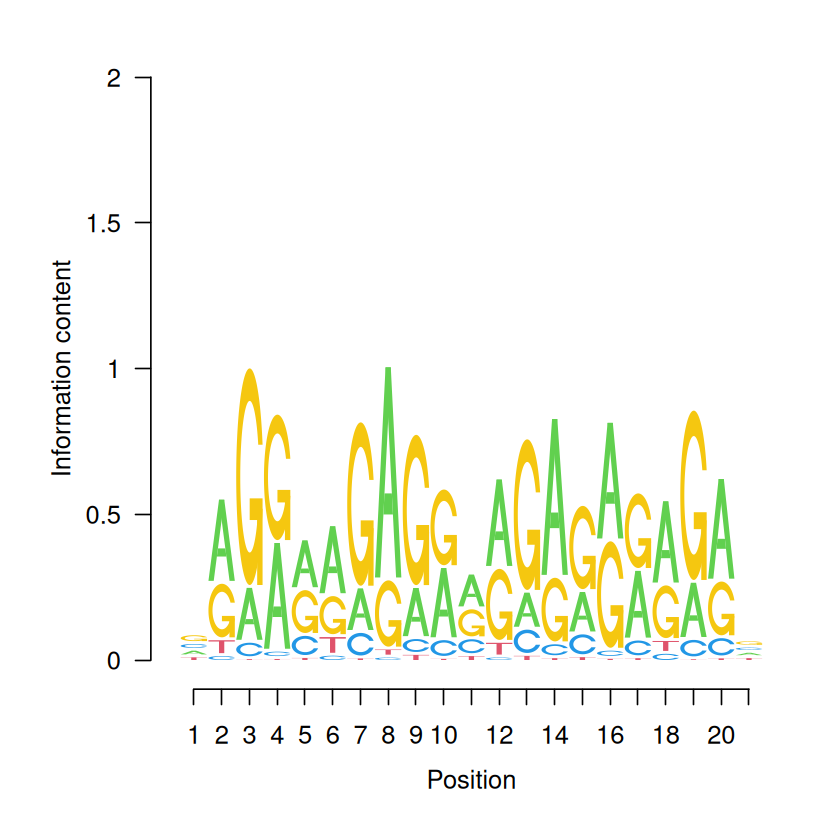

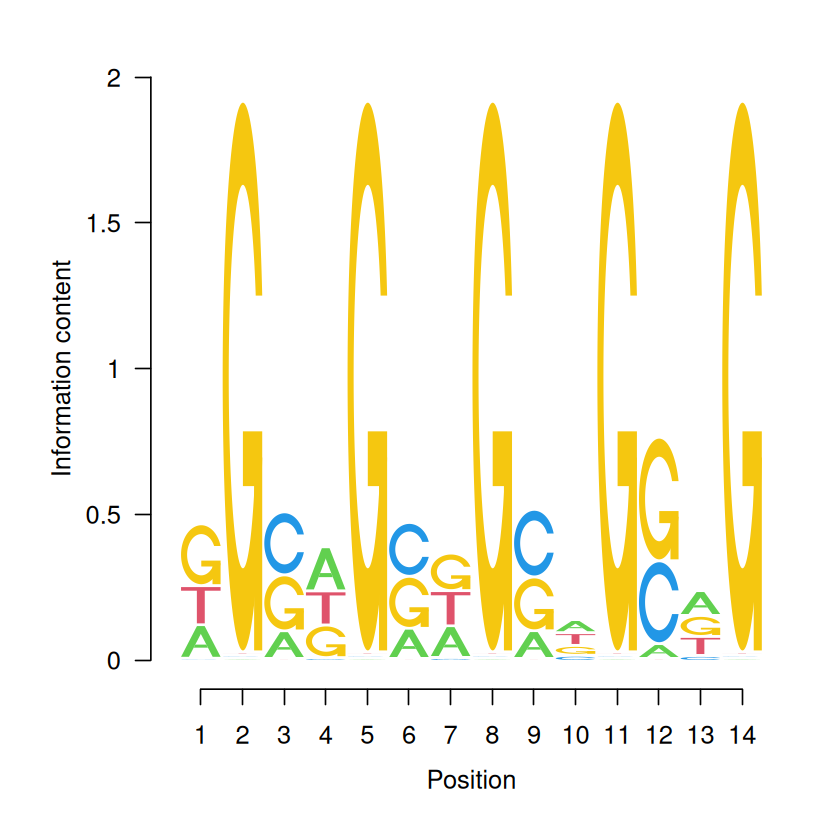

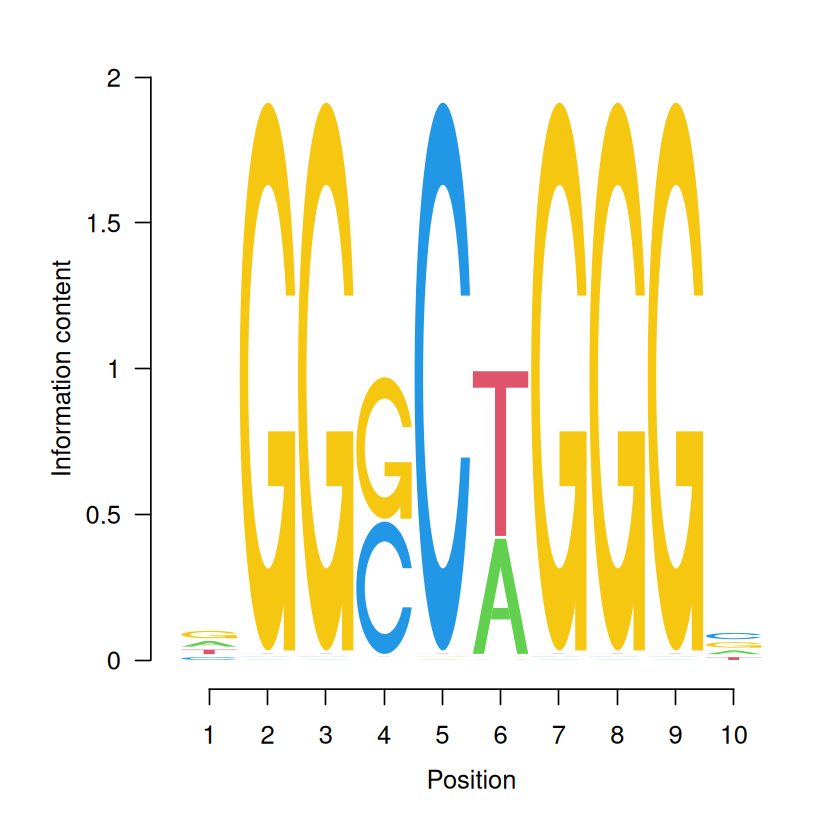

In [16]:
seqLogo(reverse_complement_pwm(pwm_list_up$motif_1))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_2))
seqLogo(reverse_complement_pwm(pwm_list_up$motif_3))
# seqLogo(pwm_list_up$motif_4)
# seqLogo(pwm_list_up$motif_5)

In [17]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [18]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 6 down-regulated motifs"
[1] "Created 3 up-regulated motifs"


In [19]:
# motifs_down_um
# motifs_up_um

In [20]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Down_motif_5
Down_motif_1        1.000        0.567        0.444        0.129        0.315
Down_motif_2        0.567        1.000        0.536        0.741       -0.271
Down_motif_3        0.444        0.536        1.000        0.456        0.258
Down_motif_4        0.129        0.741        0.456        1.000       -0.541
Down_motif_5        0.315       -0.271        0.258       -0.541        1.000
Down_motif_6        0.539        0.470        0.589        0.479        0.199
Up_motif_1          0.895        0.705        0.354        0.386        0.071
Up_motif_2          0.624        0.801        0.712        0.502        0.171
Up_motif_3          0.333        0.524        0.457        0.608        0.017
             Down_motif_6 Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1        0.539      0.895      0.624      0.333
Down_motif_2        0.470      0.705      0.801      0.524
Down_

In [21]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1      0.895      0.624      0.333
Down_motif_2      0.705      0.801      0.524
Down_motif_3      0.354      0.712      0.457
Down_motif_4      0.386      0.502      0.608
Down_motif_5      0.071      0.171      0.017
Down_motif_6      0.467      0.743      0.724


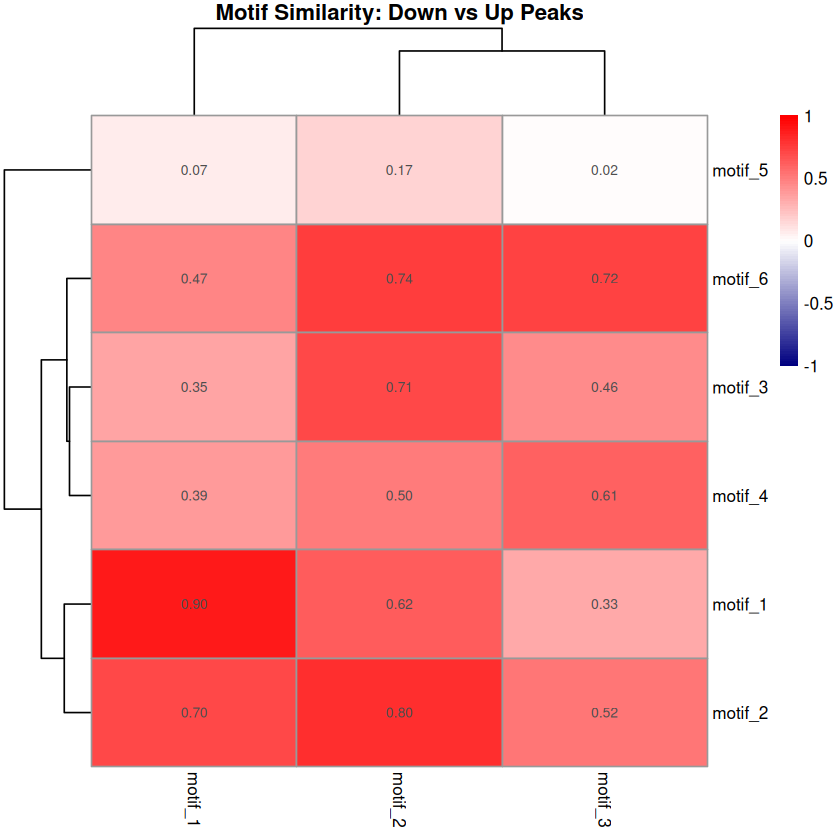

In [22]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [23]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
1     motif_1  motif_1  0.8951160
8     motif_2  motif_2  0.8014783
12    motif_6  motif_2  0.7428180
18    motif_6  motif_3  0.7241361
9     motif_3  motif_2  0.7116509
2     motif_2  motif_1  0.7048008
7     motif_1  motif_2  0.6242307
16    motif_4  motif_3  0.6077826
14    motif_2  motif_3  0.5237350
10    motif_4  motif_2  0.5015257
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif Similarity
3     motif_3  motif_1 0.35356518
13    motif_1  motif_3 0.33295184
11    motif_5  motif_2 0.17108050
5     motif_5  motif_1 0.07082320
17    motif_5  motif_3 0.01738345


In [24]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric  Value
1 Mean Similarity  0.505
2  Max Similarity  0.895
3  Min Similarity  0.017
4         Std Dev  0.250
5     Pairs > 0.5 10.000
6     Pairs > 0.7  6.000


In [25]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [26]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [27]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4 motif_5 motif_6
motif_1   0.602   0.553   0.210   0.272   0.038   0.146
motif_2   0.304   0.232  -0.145   0.295  -0.541   0.118
motif_3   0.088   0.522  -0.052   0.460  -0.496   0.150


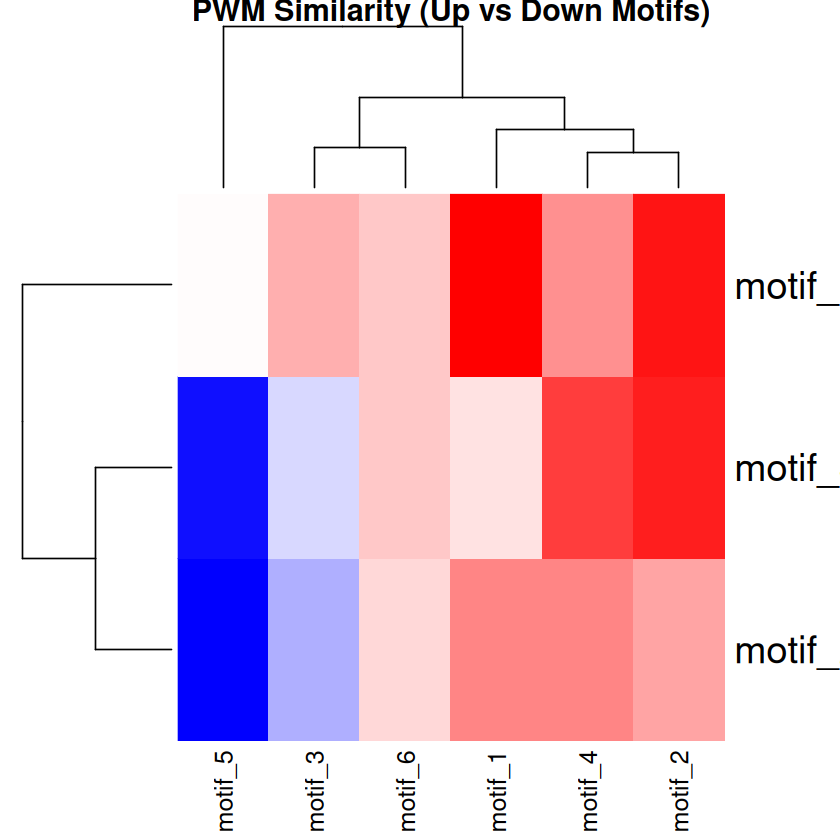

In [28]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")
